In [114]:
import numpy as np

# add parent directory to path
import os, sys
sys.path.append('..')

from utils.mmap_dataset import MMapIndexedDataset
import dask
import dask.array as da
from transformers import GPTNeoXForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt
from dask.diagnostics import ProgressBar
from dask.distributed import Lock
from tqdm import tqdm
from numpy.lib.stride_tricks import sliding_window_view

In [115]:
idx43 = np.load('0-1-43-idx.npy')
orig = np.load('0-1-idx.npy')

In [116]:
indices = idx43[:2000]

In [117]:
both_in = np.intersect1d(idx43, orig)
indices = []
for i, x in enumerate(orig):
    if i >= 2000:
        break
    if np.isin(x, both_in).item():
        indices.append(i)
indices = np.array(indices)

In [118]:
len(indices)

717

In [119]:
tokenizer = AutoTokenizer.from_pretrained(
  "EleutherAI/pythia-70m-deduped",
  revision="step3000",
  cache_dir="/om/user/sunnyd/transformers_cache",
)

inputs = tokenizer("Hello, I am", return_tensors="pt")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [120]:
matches = []
for i in range(171):
    matches.append(da.from_npy_stack(f'matches-count/{i}-0/'))
m = da.concatenate(matches, axis=1)

In [121]:
total = da.topk(m, 5, axis=1).compute()

In [122]:
np.sum(total[indices][:, 1] == 64)

498

In [123]:
np.sum(total[:, 1] == 64)

1407

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 5.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 5.000e+00, 8.000e+00, 2.000e+00, 6.000e+00, 5.000e+00,
        3.000e+00, 1.000e+01, 1.000e+00, 3.000e+00, 5.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 3.000e+00,
        4.000e+00, 6.000e+00, 8.000e+00, 7.000e+00, 6.000e+00, 1.000e+01,
        8.000e+00, 1.400e+01, 1.400e+01, 1.500e+01, 1.800e+01, 1.600e+01,
        2.200e+01, 2.000e+01, 1.900e+01, 1.300e+01, 1.800e+01, 1.300e+01,
        1.500e+01, 3.300e+01, 3.400e+01, 2.500e+01, 3.100e+01, 1.300e+01,
        2.600e+01, 2.800e+01, 3.300e+01, 1.447e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36

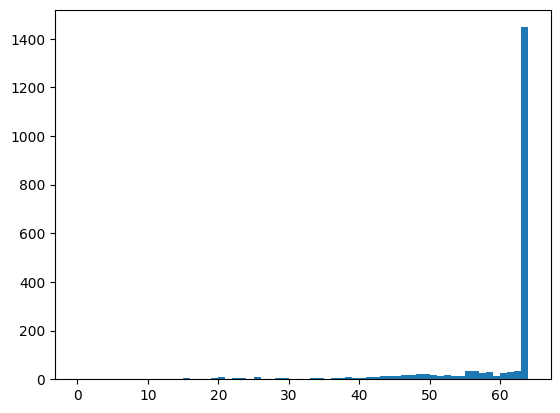

In [124]:
plt.hist(total[:, 1], bins=(np.arange(0, 65)))

In [150]:
np.argsort(total[:, 1])[:20]
# vals = m[118].compute()

array([ 118, 1732,  602,   78,  874, 1162,  778,  814,  200, 1860,  915,
       1971,  505,  350, 1246,  631, 1974, 1172,  611,  862])

(array([   9,   10,   13,   14,   17,   19,   20,   21,   26,   30,   34,
          35,   39,   52,   57,   59,   63,   68,   69,   71,   72,   77,
          78,   79,   82,   85,   86,   87,   89,   93,   94,  102,  105,
         110,  115,  118,  119,  123,  124,  125,  127,  133,  138,  150,
         153,  154,  155,  164,  165,  167,  170,  177,  183,  184,  185,
         187,  188,  193,  200,  204,  207,  208,  211,  214,  215,  217,
         220,  223,  229,  232,  239,  241,  244,  246,  251,  252,  257,
         264,  265,  269,  271,  273,  275,  277,  282,  289,  292,  300,
         303,  305,  316,  319,  320,  326,  327,  335,  337,  338,  341,
         344,  346,  348,  350,  352,  353,  355,  359,  360,  366,  369,
         370,  375,  380,  381,  383,  385,  388,  390,  391,  396,  399,
         402,  405,  408,  409,  411,  412,  414,  415,  416,  419,  427,
         432,  438,  440,  443,  452,  453,  455,  457,  458,  459,  460,
         463,  472,  480,  481,  482, 

In [138]:
# vals = m[118].compute()
np.argsort(vals)

array([10952486, 29460978,  4782410, ..., 25060493,  5298086,   233930])

In [165]:
dataset = MMapIndexedDataset('/om/user/sunnyd/data/datasets--EleutherAI--pile-standard-pythia-preshuffled-merged/document', skip_warmup = True)
# for idx in np.argsort(total[:, 1])[:50]:
for idx in np.where(total[:, 1] != 64)[0][:50]:
    print(total[idx, 1], ": ", tokenizer.decode(dataset[int(idx43[idx])][:64]), '\n\n')

    reading sizes...
    reading pointers...
    reading document index...
    creating numpy buffer of mmap...
    creating memory view of numpy buffer...
56 :  _VIRTUALIZATION is not set
<|endoftext|><?xml version="1.0"?>
<ZopeData>
  <record id="1" aka="AAAAAAAAAAE=">
    <pickle>
      <global name="Category" module="erp5.portal_type"/> 


47 :   You will hear back about the application within no more than 10 business days, at the latest.<|endoftext|>/*
 * Copyright (c) 2015, Oracle and/or its affiliates. All rights reserved.
 * DO NOT ALTER OR REMOVE COPYRIGHT NOTICES OR THIS FILE HEADER.
 *
 * This code 


62 :  : 0.021 (5)
  ---------------------------------------------------------------- ---------------------------------------------------------------------------------------------

Special details {#specialdetails}

  -------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [145]:
tokenizer.decode(dataset[25060493])

' 7 + 0 = 0. Let c(k) = -11*k + 208. What is the remainder when c(12) is divided by q?\n8\nLet y(z) = z**2 - 6*z - 22. Suppose 2*a - 12 = 14. Calculate the remainder when a is divided by y(9).\n3\nSuppose -405 = -8*q + 523. Calculate the remainder when 1506 is divided by q.\n114\nLet p = 25 + 47. Let y be (192/(-10))/((-13)/((-910)/(-28))). Let b = p - y. Calculate the remainder when 95 is divided by b.\n23\nLet q(z) = z**3 - 3*z**2 - z + 6. Suppose 0 = 2*s, 0*x + 15 = -x + 5*s. Let i = x + 26. What is the remainder when i is divided by q(3)?\n2\nLet g = -343 + 412. Calculate the remainder when g is divided by 49.\n20\nLet f be 1 + (2 + -1)*35. Let u = -21 + f. Let d(g) = -g**2 - 14*g - 5. What is the remainder when d(-7) is divided by u?\n14\nSuppose 4*a - 27 = -7. Let j = 518 + -509. Calculate the remainder when j is divided by a.\n4\nLet f(k) = 48*k**2 - 8*k - 9. What is the remainder when 181 is divided by f(-1)?\n40\nLet u(t) = -7*t - 7. Let h(i) = 27*i - 3. Let b be h(7). Suppose

In [66]:
indices = np.load('0-1-idx.npy')

In [131]:
with open('0-1-found.txt', 'a') as f:
    f.write("Found,Text\n")
    for idx in tqdm(range(0, 2000)):
        orig = indices[idx]
        str_match = dataset[int(orig)][:64]
        found = matches[idx].compute()
        num_matches = np.sum(found)
        f.write(f"{num_matches}," + tokenizer.decode(str_match).encode("unicode_escape").decode("utf-8")+"\n")
        # if num_matches > 1:
        #     # print(f"Found {num_matches}\n")
        #     other_match = np.where(found)[0][1]
        #     # print(tokenizer.decode(str_match))
        #     f.write(f"{num_matches}: " + tokenizer.decode(str_match).encode('string_escape'))
        # else:
        #     f.write("not found:" + tokenizer.decode(str_match))

100%|██████████| 2000/2000 [34:46<00:00,  1.04s/it]


In [124]:
other_str = dataset[int(other_match)]
matched_idx = 0
for i in range(len(other_str) - 64):
    if (other_str[i:i+64] == str_match).all():
        print(i)
        matched_idx = i
print("Orig\n")
print(tokenizer.decode(str_match))
print("Matched:\n")
print(tokenizer.decode(other_str[matched_idx:]))
# print(matched_idx)
# print(str_match, other_str[matched_idx:])

32
Orig

 www.npr.org for further information.

NPR transcripts are created on a rush deadline by Verb8tm, Inc., an NPR contractor, and produced using a proprietary transcription process developed with NPR. This text may not be in its final form and may be updated or revised in the future. Acc
Matched:

 www.npr.org for further information.

NPR transcripts are created on a rush deadline by Verb8tm, Inc., an NPR contractor, and produced using a proprietary transcription process developed with NPR. This text may not be in its final form and may be updated or revised in the future. Accuracy and availability may vary. The authoritative record of NPR’s programming is the audio record.<|endoftext|>Blues Face Liverpool In Champions League For The First Time Manchester City recorded only their fifth win at Everton in the Premier League to move to within one win of clinching the Premier League title, which they can do next Saturday at home to Manchester United. But before that, the blues tak..

array([ 4022,   305, 48095, ..., 17440,    10,   187], dtype=uint16)

In [20]:
# da.sum(matches, 1).compute()
np.where(matches[1].compute())

(array([  1060,  40782,  41209, 185862]),)

In [2]:
def find_match(a, b):
    # return np.dot(a,b.T).reshape(1, 1, 1, 1)
    all_matches = []
    for i in range(b.shape[1] - a.shape[1]):
        all_matches.append(np.max(np.abs(np.expand_dims(a, axis=1) - b[:, i:i+a.shape[1]]), axis=-1) == 0)
    matches = np.logical_or.reduce(all_matches, axis=0)
    return np.expand_dims(np.expand_dims(matches, -1), -1)

In [3]:
# def custom_hash(arr):
#     # Efficiently apply bitwise operations on each row
#   shifted_left = np.left_shift(arr, np.arange(arr.shape[1]))
#   shifted_right = np.right_shift(arr, arr.shape[1] - np.arange(arr.shape[1]) - 1)
#   # Combine with XOR and reduce with bitwise OR along each row
#   hashed_rows = np.bitwise_xor.reduce(np.bitwise_xor(shifted_left, shifted_right), axis=1)
#   # Ensure positive value and modulo by a large prime number
#   hashed_rows = (hashed_rows % 2**64) % 1610612741
#   return hashed_rows
# custom_hash(emergent)

In [5]:
# %time  np.sum(find_match(emergent, x).squeeze())

In [25]:
# np.max(np.abs(sliding_window_view(x, (10000, 64)).squeeze() - emergent.reshape(-1, 1, 1, 64)), axis=-1)

MemoryError: Unable to allocate 9.25 TiB for an array with shape (1000, 1986, 10000, 64) and data type int64